In [4]:
from Linguo_tools import * 
from time import time

The following cell defines the architecture of the neural network

In [6]:
# Modify parameters here
#corpus_name = "Corpora/eurohundoab"
corpus_name = euro.toy
max_ngram = 6
hap_thresh = 1
folds = 10
train_proportion = 0.8
embed_dim = 32
lstm_dim = 32
hidden_dim = 32
epochs = 3
learning_rate=0.1


exp = Experimenter()

t1 = time()

gram = exp.load_raw_grammatical_corpus(corpus_name)


for n in range(2,7):
    
    labeled_g = [[sentence,1] for sentence in prepro_gram]
    labeled_ws = [[sentence,0] for sentence in word_salads]
    
    message = "\t{} word salads generated in {:.3f} seconds".format(nsal,te)
    
    outputWS_fname = "Data/"+corpus_name+ n+ "-gramWS"
   
    with open(outputWS_fname,"w") as wsfile:
        for labeled_sent in labeled_ws:
            tokens = labeled_sent[0]
            while tokens[0] == "#":
                tokens.pop(0)
            sentence = " ".join(tokens) + "\n"
            wsfile.write(sentence)
    print(message)
    te = time()- t1
 
    message = "Word salad data has been generated for order {} and saved in {} ".format(n,outputWS_fname)

outputWS_fname = corpus_name + "-pretrain"
with open(output_fname,"w") as wsfile:
    for labeled_sent in labeled_g:
        tokens = labeled_sent[0]
        while tokens[0] == "#":
            tokens.pop(0)
        sentence = " ".join(tokens) + "\n"
        wsfile.write(sentence)


Full corpus has 0 sentences,
        	 100000 were dumped,
        among which 3694 interogatives or exclamatives


NameError: name 'get_vocabulary' is not defined

In [33]:
#labeled_ws[:100]
#labeled_g[:100]




In [57]:
random.shuffle(labeled_g)
random.shuffle(labeled_ws)
cutoff = math.floor(train_proportion * len(labeled_g))
train_g, test_g = labeled_g[:cutoff],labeled_g[cutoff:]
train_ws,test_ws = labeled_ws[:cutoff],labeled_ws[cutoff:]

train_data = train_g + train_ws
random.shuffle(train_data)

test_data = test_g + test_ws
random.shuffle(test_data)

epochs = 8
# Train the Model
model = train_model(train_data,
                    embed_dim,
                    lstm_dim,
                    hidden_dim,
                    word2id,
                    epochs,
                    learning_rate)
te = time()-t1
message = "Training finished in {:.4f} seconds, starting testing...".format(te)
print(message)
print("...")
t1 = time()
# Test the Model
fold_results = test_model(test_data,model,word2id)
result_list.append(fold_results)
te = time()-t1
message = "Testing finished in {} seconds".format(te)
print(message)
message = "\Accuracy is {}".format(fold_results['accuracy'])
print(message)


	 Epoch0:14045.571910912098
	 Epoch1:11181.830163920305
	 Epoch2:10130.082496052746
	 Epoch3:9347.070743460625
	 Epoch4:8630.008796883783
	 Epoch5:8012.440645607751
	 Epoch6:7472.498376756318
	 Epoch7:7084.894796584902
Training finished in 22392.4917 seconds, starting testing...
...
Testing finished in 63.47518277168274 seconds
\Accuracy is 0.8218993812214151


In [73]:
labeled_ws[0]

def train_and_test (train_data,
                    embed_dim,
                    lstm_dim,
                    hidden_dim,
                    word2id,
                    epochs,
                    learning_rate,
                    test_data):

    voc_size = len(word2id)
    # Initialize model
    linguo = Linguo(embed_dim, voc_size, lstm_dim, hidden_dim) 
    optimizer = optim.SGD(linguo.parameters(),lr=learning_rate)
    loss_function = nn.NLLLoss()
    
    accuracy = test_model(test_data,linguo,word2id)["accuracy"]
    print("\t Accuracy:{}".format(accuracy))        
    
    for i in range(epochs):
        epoch_loss = 0
        random.shuffle(train_data)
        for data, label in train_data:
            # Restart gradient
            linguo.zero_grad()
            # Run model
            in_sentence = prepare_input(word2id,data)
            target = autograd.Variable(torch.LongTensor([label]))
            prediction = linguo(in_sentence)
            #Calculate loss and backpropagate

            #Squared Loss
            #loss = torch.pow(target-prediction.view(1),2)
            loss = loss_function(prediction,target) 
            loss.backward()
            optimizer.step()
            #for parameter in linguo.parameters():
            #   parameter.data.sub_(parameter.grad.data*learning_rate)
            epoch_loss += loss.data[0]
        print("Epoch{}:{}".format(i,epoch_loss))
        accuracy = test_model(test_data,linguo,word2id)["accuracy"]
        print("\t Accuracy:{}".format(accuracy))        
                    
    return linguo


train_and_test (train_data,
                    embed_dim,
                    lstm_dim,
                    hidden_dim,
                    word2id,
                    epochs,
                    learning_rate,
                    test_data)



	 Accuracy:0.5005380683346785
Epoch0:14483.33628702389
	 Accuracy:0.7999730965832661
Epoch1:11496.337189447331
	 Accuracy:0.8123486682808717
Epoch2:10237.323587383004
	 Accuracy:0.8237826203927899


KeyboardInterrupt: 

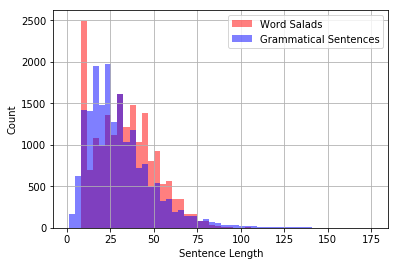

In [56]:
import matplotlib.pyplot as plt
lengths_ws = [len(ws[0]) for ws in labeled_ws]
lengths_g = [len(g[0]) for g in labeled_g]

plt.hist(lengths_ws, bins, alpha=0.5, label='Word Salads',facecolor="r")
plt.hist(lengths_g, bins, alpha=0.5, label='Grammatical Sentences',facecolor="b")
plt.legend(loc='upper right')

plt.xlabel('Sentence Length')
plt.ylabel('Count')
#plt.title('Sequence lengths for trigram word salads and corpus sentences')

plt.grid(True)
plt.show()

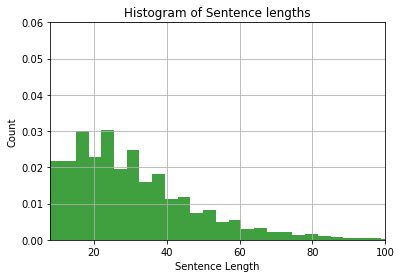

In [48]:

n, bins, patches = plt.hist(lengths_g, 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Sentence Length')
plt.ylabel('Count')
plt.title('Histogram of Sentence lengths')
plt.axis([8, 100, 0, 0.06])
plt.grid(True)
plt.show()

In [60]:
error = [14045.571910912098,11181.830163920305,10130.082496052746,9347.070743460625,8630.008796883783,8012.440645607751,7472.498376756318,7084.894796584902]

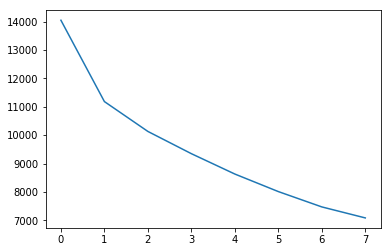

In [61]:
plt.plot(error)
plt.xlabel('Sentence Length')
plt.ylabel('Count')
plt.show()

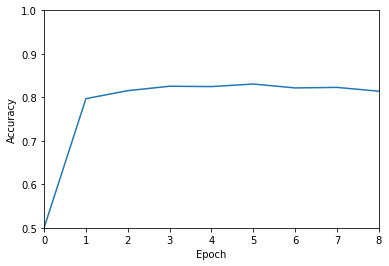

In [71]:
accuracies = [0.5,0.7970137207425343,0.8153080441216034
,0.825531342480495,0.824724239978477,0.8306429916599408,0.8216303470540759,0.8228410008071025
,0.8140973903685768]
plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.axis([0, 8, 0.5, 1])
plt.show()